In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns',None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Description of the features:
1. id = unique identity of the house
2. date = current date
3. price = price of each house sold.This is our target variable
4. bedrooms = number of bedrooms
5. bathrooms = number of bathrooms, 0.5 means there is a toilet but no shower   
6. sqft_living = square footage of the apartment's interior space
7. sqft_lot = square footage of the entire land space
8. floors = number of floors
9. waterfront = a dummy variable for whether the apartment overlooks a waterfront or not. Waterfront is an area next to water
10. view = an index of how good the view from the property is
11. condition = an index on the condition of the apartment
12. grade = An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
13. sqft_above = square footage of the interior house space that is above ground level
14. sqft_basement = square footage of the interior house space that is below ground level
15. yr_built =  year when the house was built
16. yr_renovated = year when the house got renovated. 0 implies that the house had not undergone any renovation
17. zipcode = zipcode of the area
18. lat = latitude of the area
19. long = longitude of the area
20. sqft_living15 =  The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the entire land space of the nearest 15 neighbors


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312049,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaN,NaN,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,NaN,NaN,NaN,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,NaN,NaN,NaN,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,NaN,NaN,NaN,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,NaN,NaN,NaN,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,NaN,NaN,NaN,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,NaN,NaN,NaN,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0
view,21613.0,NaN,NaN,NaN,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Observation : There are no null values.

In [6]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


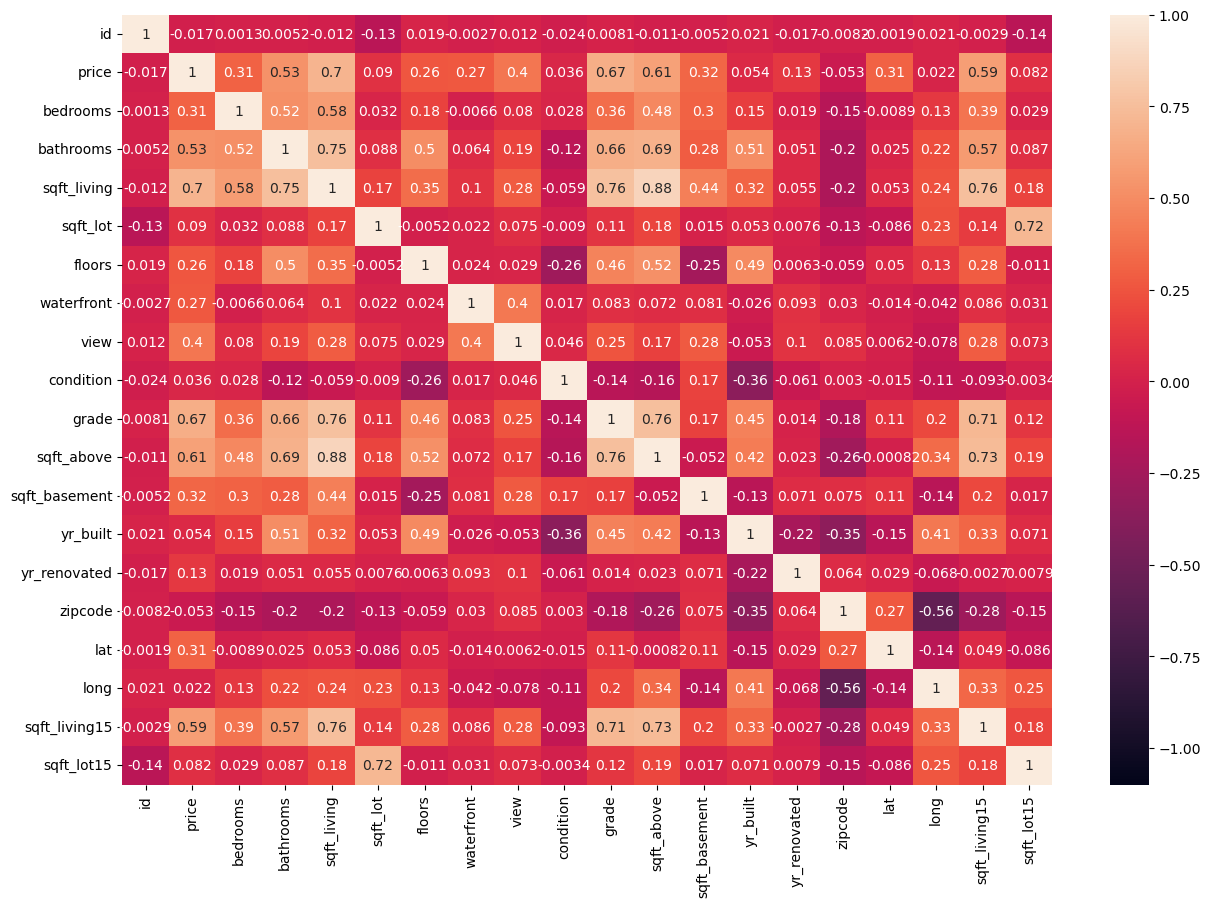

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g',vmax=-1,vmin=1)
plt.show()

OBSERVATION : The variables sqft_living and sqft_above are highly correlated. There are other pairs who have high degree of correlation between them as well.

In [8]:
columns=list(df.columns)
columns

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [9]:
discrete=[data for data in columns if df[data].dtypes=='O']
discrete

['date']

In [10]:
continuous=[data for data in columns if df[data].dtypes!='O']
continuous

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

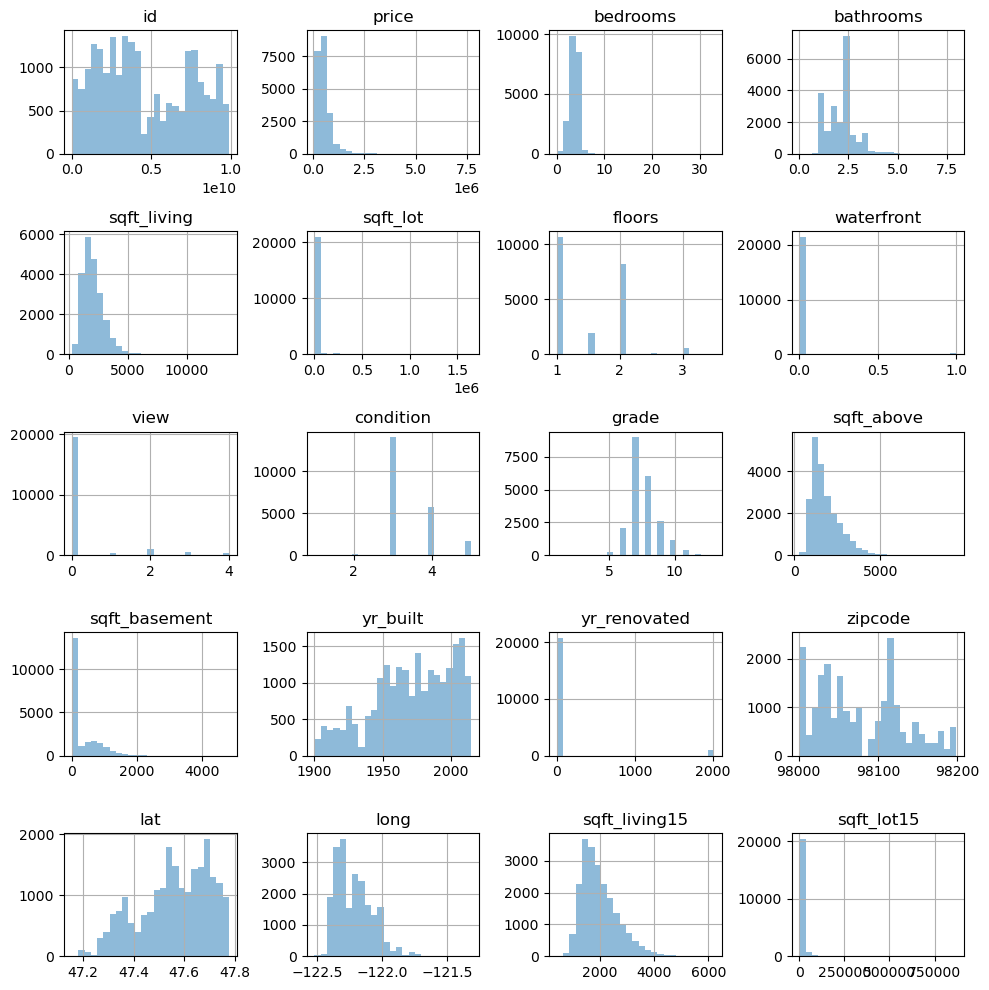

In [11]:
df[continuous].hist(bins=25,figsize=(10,10),alpha=0.5)
plt.tight_layout()

plt.show()

In [12]:
for i in continuous:
    print(i)
    print(df[i].value_counts())

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64
price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50    

In [13]:
discrete_numerical=['bedrooms','bathrooms','floors','waterfront','view','condition','grade']

bedrooms


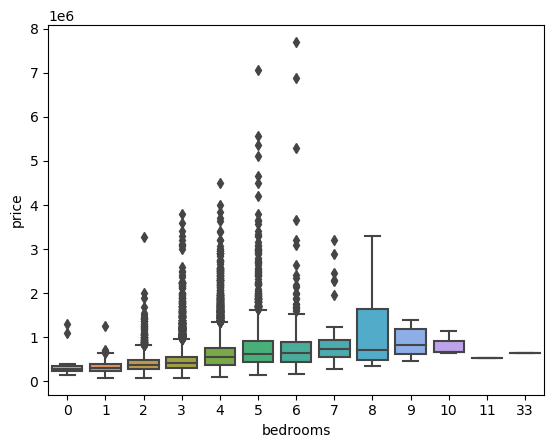

bathrooms


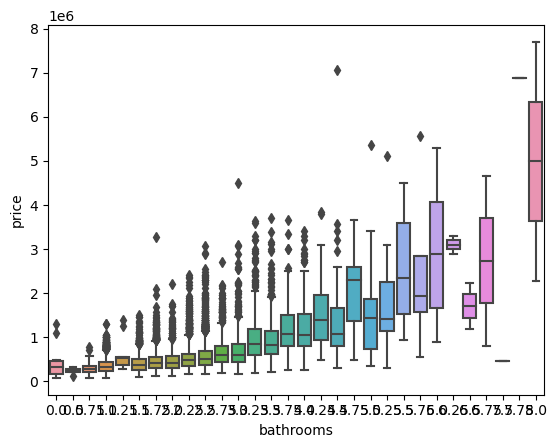

floors


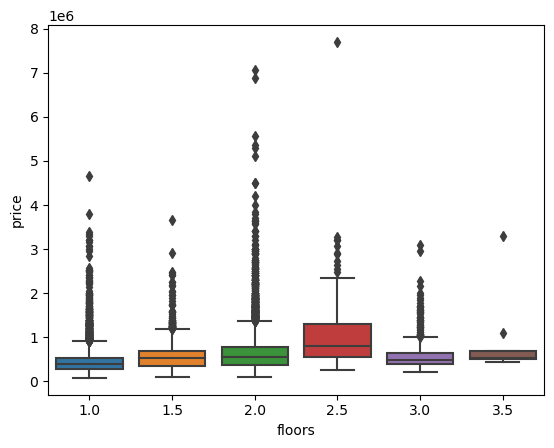

waterfront


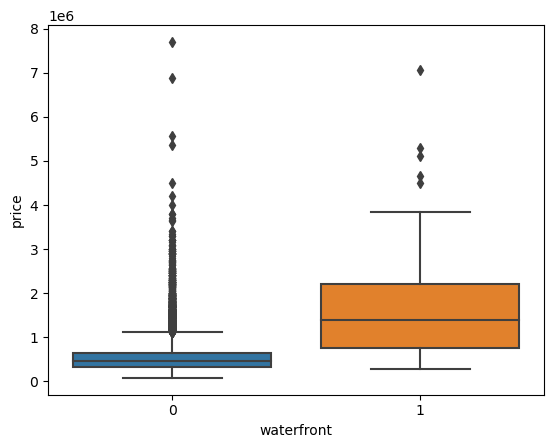

view


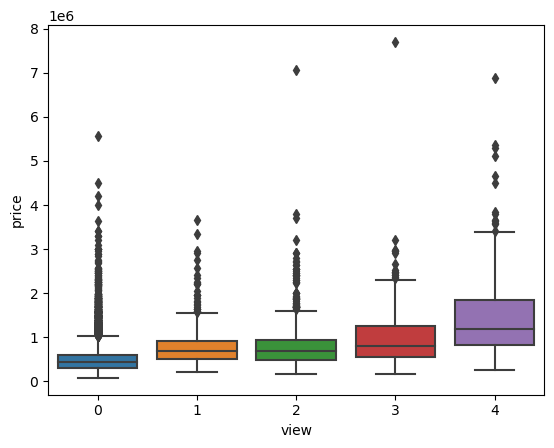

condition


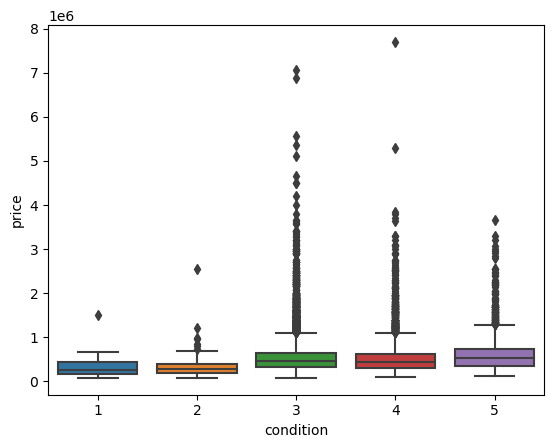

grade


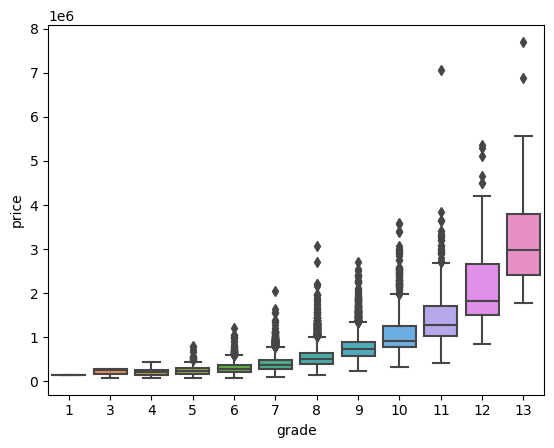

In [14]:
#discrete numerical vs price
for i in discrete_numerical:
    print(i)
    sns.boxplot(x=df[i],y=df['price'])
    plt.show()

Grade and waterfront effects price clearly,on the other hand view seems to be less effective but it has also some effect on price.

<AxesSubplot:xlabel='long', ylabel='lat'>

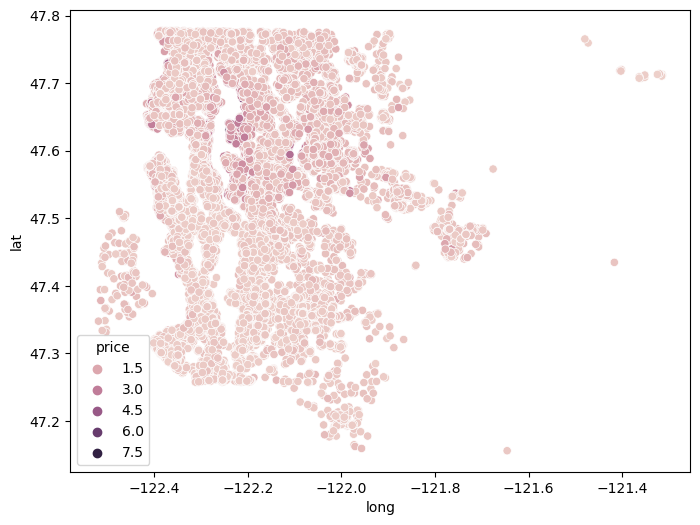

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

we cannot conclude anything about the location and the price.

**DATA PREPROCESSING**

In [16]:
df_dm=df.copy()

In [17]:
df_dm.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


Adding the ages and renovation ages of the houses when they were sold

In [18]:
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']

df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0


In [19]:
df_dm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,0.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,0.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,0.0


In [20]:
# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)

# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

In [21]:
df_dm.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv,age_binned,age_rnv_binned
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0,51-75,<1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0,51-75,11-25


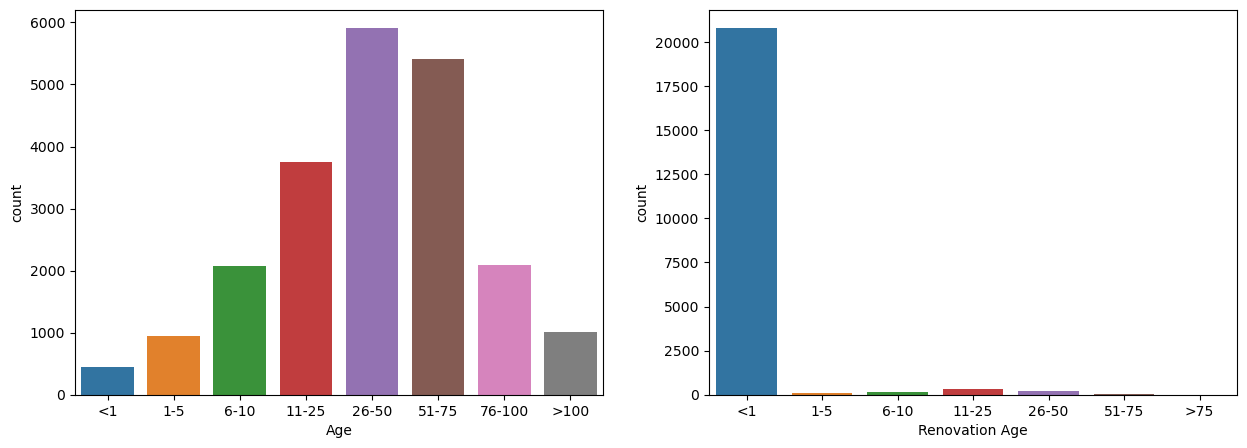

In [22]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.countplot(df_dm['age_binned'],ax=axes[0])
sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])

axes[0].set(xlabel='Age')
axes[1].set(xlabel='Renovation Age');

Most of the age of the house is between 11 to 75 years. Renovation age for almost all the houses is less than 1

In [23]:
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

In [24]:
df_dm.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv,age_binned_<1,age_binned_1-5,age_binned_6-10,age_binned_11-25,age_binned_26-50,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


# MODEL FITTING

Model 1. Simple linear regression

In [25]:
#choosing sqft_living as the independent variable and price as the dependent valiable(because they have a good correlation between them

import statsmodels.api as sm
X=sm.add_constant(df['sqft_living'])
Y=df['price']

In [26]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=100)

In [27]:
df_lm=sm.OLS(train_Y,train_X).fit()

In [28]:
df_lm.params

const         -42628.976515
sqft_living      280.685417
dtype: float64

Thus the estimated prediction model can be written as
price= -42628.976515 + 280.685417 *(sqft_living)

In [29]:
df_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                 OLS               Adj. R-squared:      0.487      
Dependent Variable:    price             AIC:                 480613.6916
Date:                  2023-03-13 20:52  BIC:                 480629.2074
No. Observations:      17290             Log-Likelihood:      -2.4030e+05
Df Model:              1                 F-statistic:         1.642e+04  
Df Residuals:          17288             Prob (F-statistic):  0.00       
R-squared:             0.487             Scale:               6.9127e+10 
-------------------------------------------------------------------------
               Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-------------------------------------------------------------------------
const       -42628.9765 4963.3769  -8.5887 0.0000 -52357.6977 -32900.2554
sqft_living    280.6854    2.1903 128.1487 0.0000    276.3922    284.9786
-------------------------------------------------------------------------
Omnibus:               11909.901       Durbin-Watson:          2.018     
Prob(Omnibus):         0.000           Jarque-Bera (JB):       419310.893
Skew:                  2.854           Prob(JB):               0.000     
Kurtosis:              26.441          Condition No.:          5625      
=========================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

Observation :
The R-squared value is 0.487 ie the model explains 48.7% of variation in price. Also there is statistically significant relationship between sqft_living and price

In [30]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pred_train_Y=df_lm.predict(train_X)
pred_test_Y=df_lm.predict(test_X)

print('the r2 score for training dataset is',metrics.r2_score(train_Y,pred_train_Y))
print('RMSE for training dataset is ',np.sqrt(metrics.mean_squared_error(train_Y,pred_train_Y)))

print('**********************************************************************************************')

print('the r2 score for testing dataset is',metrics.r2_score(test_Y,pred_test_Y))
print('RMSE for testing dataset is ',np.sqrt(metrics.mean_squared_error(test_Y,pred_test_Y)))

print('**********************************************************************************************')


ols = LinearRegression()
ols_cv_mse = cross_val_score(ols, X, Y, cv=5)
print('CV : ',ols_cv_mse.mean())

the r2 score for training dataset is 0.4871565982411401
RMSE for training dataset is  262905.1996831176
**********************************************************************************************
the r2 score for testing dataset is 0.5155709745445145
RMSE for testing dataset is  255511.37998953433
**********************************************************************************************
CV :  0.49108629053771236


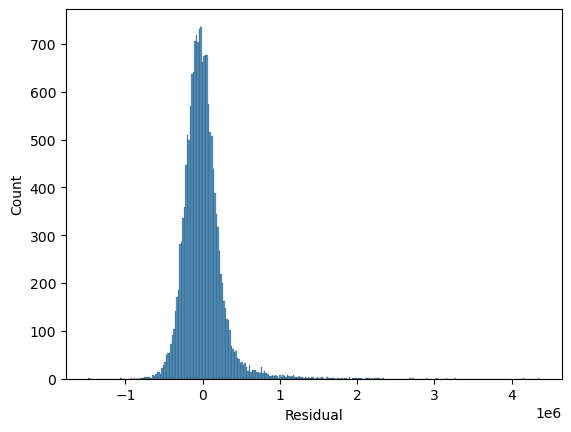

In [31]:
df_resid = df_lm.resid
res=pd.DataFrame(df_resid,columns=['Residual'])
sns.histplot(data=res,x=res['Residual'])
plt.show()

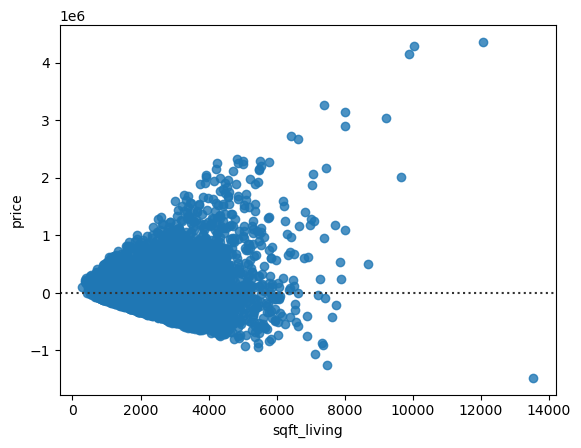

In [32]:
sns.residplot(x='sqft_living',y='price',data=df)
plt.show()

Thus we reject the model because it is a poor fit.

Model 2. Multiple Linear regression

In [33]:
df_dm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv,age_binned_<1,age_binned_1-5,age_binned_6-10,age_binned_11-25,age_binned_26-50,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,0.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [34]:
df_dm=df_dm.drop(['id','date','yr_built','yr_renovated','sales_yr','age','age_rnv'],axis=1)
df_dm.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_binned_<1,age_binned_1-5,age_binned_6-10,age_binned_11-25,age_binned_26-50,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [35]:
df_dm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age_binned_<1', 'age_binned_1-5', 'age_binned_6-10',
       'age_binned_11-25', 'age_binned_26-50', 'age_binned_51-75',
       'age_binned_76-100', 'age_binned_>100', 'age_rnv_binned_<1',
       'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
       'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75'],
      dtype='object')

In [36]:

X_features=[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age_binned_<1', 'age_binned_1-5', 'age_binned_6-10',
       'age_binned_11-25', 'age_binned_26-50', 'age_binned_51-75',
       'age_binned_76-100', 'age_binned_>100', 'age_rnv_binned_<1',
       'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
       'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75']

X=sm.add_constant(df_dm[X_features])


In [37]:
Y=df_dm['price']

In [38]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=3)

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(17290, 32)
(17290,)
(4323, 32)
(4323,)


In [39]:
model_1=sm.OLS(train_Y,train_X).fit()

In [40]:
model_1.params

const                   6.900174e+06
bedrooms               -3.334919e+04
bathrooms               3.765496e+04
sqft_living             1.107176e+02
sqft_lot                1.228266e-01
floors                 -1.267260e+04
waterfront              5.698174e+05
view                    5.413861e+04
condition               3.172755e+04
grade                   9.523006e+04
sqft_above              7.053524e+01
sqft_basement           4.017808e+01
zipcode                -6.500612e+02
lat                     6.033358e+05
long                   -2.100317e+05
sqft_living15           2.423861e+01
sqft_lot15             -3.086516e-01
age_binned_<1           8.178355e+05
age_binned_1-5          8.081378e+05
age_binned_6-10         7.913930e+05
age_binned_11-25        7.731634e+05
age_binned_26-50        8.032623e+05
age_binned_51-75        8.996161e+05
age_binned_76-100       9.853594e+05
age_binned_>100         1.021406e+06
age_rnv_binned_<1       9.659579e+05
age_rnv_binned_1-5      1.080043e+06
a

In [41]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                     OLS                     Adj. R-squared:            0.700      
Dependent Variable:        price                   AIC:                       471557.4024
Date:                      2023-03-13 20:52        BIC:                       471782.3811
No. Observations:          17290                   Log-Likelihood:            -2.3575e+05
Df Model:                  28                      F-statistic:               1444.      
Df Residuals:              17261                   Prob (F-statistic):        0.00       
R-squared:                 0.701                   Scale:                     4.0878e+10 
-----------------------------------------------------------------------------------------
                        Coef.       Std.Err.      t     P>|t|     [0.025        0.975]   
-----------------------------------------------------------------------------------------
const                6900173.8975 2633933.6407   2.6197 0.0088 1737396.8035 12062950.9914
bedrooms              -33349.1904    2114.6929 -15.7702 0.0000  -37494.2031   -29204.1778
bathrooms              37654.9641    3684.3695  10.2202 0.0000   30433.2262    44876.7019
sqft_living              110.7176       2.5518  43.3882 0.0000     105.7159      115.7194
sqft_lot                   0.1228       0.0519   2.3688 0.0179       0.0212        0.2245
floors                -12672.5956    4463.4974  -2.8392 0.0045  -21421.5032    -3923.6880
waterfront            569817.4017   19383.6705  29.3968 0.0000  531823.4414   607811.3620
view                   54138.6091    2415.8714  22.4096 0.0000   49403.2560    58873.9621
condition              31727.5550    2661.2496  11.9221 0.0000   26511.2359    36943.8741
grade                  95230.0581    2424.6092  39.2765 0.0000   90477.5782    99982.5380
sqft_above                70.5352       2.5425  27.7428 0.0000      65.5517       75.5187
sqft_basement             40.1781       2.9858  13.4565 0.0000      34.3257       46.0305
zipcode                 -650.0612      37.7965 -17.1990 0.0000    -724.1462     -575.9762
lat                   603335.8113   12112.7937  49.8098 0.0000  579593.5072   627078.1155
long                 -210031.7322   14819.3606 -14.1728 0.0000 -239079.1822  -180984.2823
sqft_living15             24.2386       3.8814   6.2449 0.0000      16.6308       31.8465
sqft_lot15                -0.3087       0.0810  -3.8097 0.0001      -0.4675       -0.1498
age_binned_<1         817835.5498  329063.6043   2.4853 0.0130  172837.5086  1462833.5909
age_binned_1-5        808137.8409  328634.8286   2.4591 0.0139  163980.2436  1452295.4381
age_binned_6-10       791393.0347  328692.2676   2.4077 0.0161  147122.8512  1435663.2182
age_binned_11-25      773163.4098  328457.7604   2.3539 0.0186  129352.8842  1416973.9354
age_binned_26-50      803262.2932  328542.1667   2.4449 0.0145  159286.3227  1447238.2637
age_binned_51-75      899616.1023  330193.3342   2.7245 0.0064  252403.6760  1546828.5286
age_binned_76-100     985359.4311  330459.1882   2.9818 0.0029  337625.9039  1633092.9582
age_binned_>100      1021406.2357  330353.1732   3.0919 0.0020  373880.5087  1668931.9627
age_rnv_binned_<1     965957.8881  377244.1349   2.5606 0.0105  226521.1201  1705394.6561
age_rnv_binned_1-5   1080042.5304  377409.4228   2.8617 0.0042  340281.7814  1819803.2794
age_rnv_binned_6-10  1073155.5530  377183.4871   2.8452 0.0044  333837.6608  1812473.4452
age_rnv_binned_11-25 1027152.3213  376773.3704   2.7262 0.0064  288638.2994  1765666.3432
age_rnv_binned_26-50  970708.1689  376874.3066   2.5757 0.0100  231996.3018  1709420.0360
age_rnv_binned_51-75  878748.7627  378113.3583   2.3240 0.0201  137608.2286  1619889.2968
age_rnv_binned_>75    904408.6731  417583.3557   2.1658 0.0303   85902.9406  1722914.4055
--------------------

Model shows 51.4% variability in price. 

In [42]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pred_train_Y=model_1.predict(train_X)
pred_test_Y=model_1.predict(test_X)

print('the r2 score for training dataset is',metrics.r2_score(train_Y,pred_train_Y))
print('RMSE for training dataset is ',np.sqrt(metrics.mean_squared_error(train_Y,pred_train_Y)))

print('**********************************************************************************************')

print('the r2 score for testing dataset is',metrics.r2_score(test_Y,pred_test_Y))
print('RMSE for testing dataset is ',np.sqrt(metrics.mean_squared_error(test_Y,pred_test_Y)))

print('**********************************************************************************************')


ols = LinearRegression()
ols_cv_mse = cross_val_score(ols, X, Y, cv=5)
print('CV : ',ols_cv_mse.mean())

the r2 score for training dataset is 0.7007648952192325
RMSE for training dataset is  202014.21551181583
**********************************************************************************************
the r2 score for testing dataset is 0.7131690871261143
RMSE for testing dataset is  191879.54960438132
**********************************************************************************************
CV :  0.6982685163973728


In [43]:

from statsmodels.stats.outliers_influence import variance_inflation_factor 
def get_vif_factors( X ): 
 X_matrix = X.to_numpy() 
 vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ] 
 vif_factors = pd.DataFrame() 
 vif_factors['column'] = X.columns 
 vif_factors['vif'] = vif 
 return vif_factors 

In [44]:
vif_factors = get_vif_factors( X[X_features] ) 
vif_factors

,column,vif
0,bedrooms,1.684530
1,bathrooms,3.400051
2,sqft_living,inf
3,sqft_lot,2.104094
4,floors,2.465011
5,waterfront,1.209197
6,view,1.442612
7,condition,1.260733
8,grade,3.436710
9,sqft_above,inf


In [45]:
columns_with_large_vif = vif_factors[vif_factors.vif>4].column 
columns_with_large_vif

2              sqft_living
9               sqft_above
10           sqft_basement
16           age_binned_<1
17          age_binned_1-5
18         age_binned_6-10
19        age_binned_11-25
20        age_binned_26-50
21        age_binned_51-75
22       age_binned_76-100
23         age_binned_>100
24       age_rnv_binned_<1
25      age_rnv_binned_1-5
26     age_rnv_binned_6-10
27    age_rnv_binned_11-25
28    age_rnv_binned_26-50
29    age_rnv_binned_51-75
30      age_rnv_binned_>75
Name: column, dtype: object

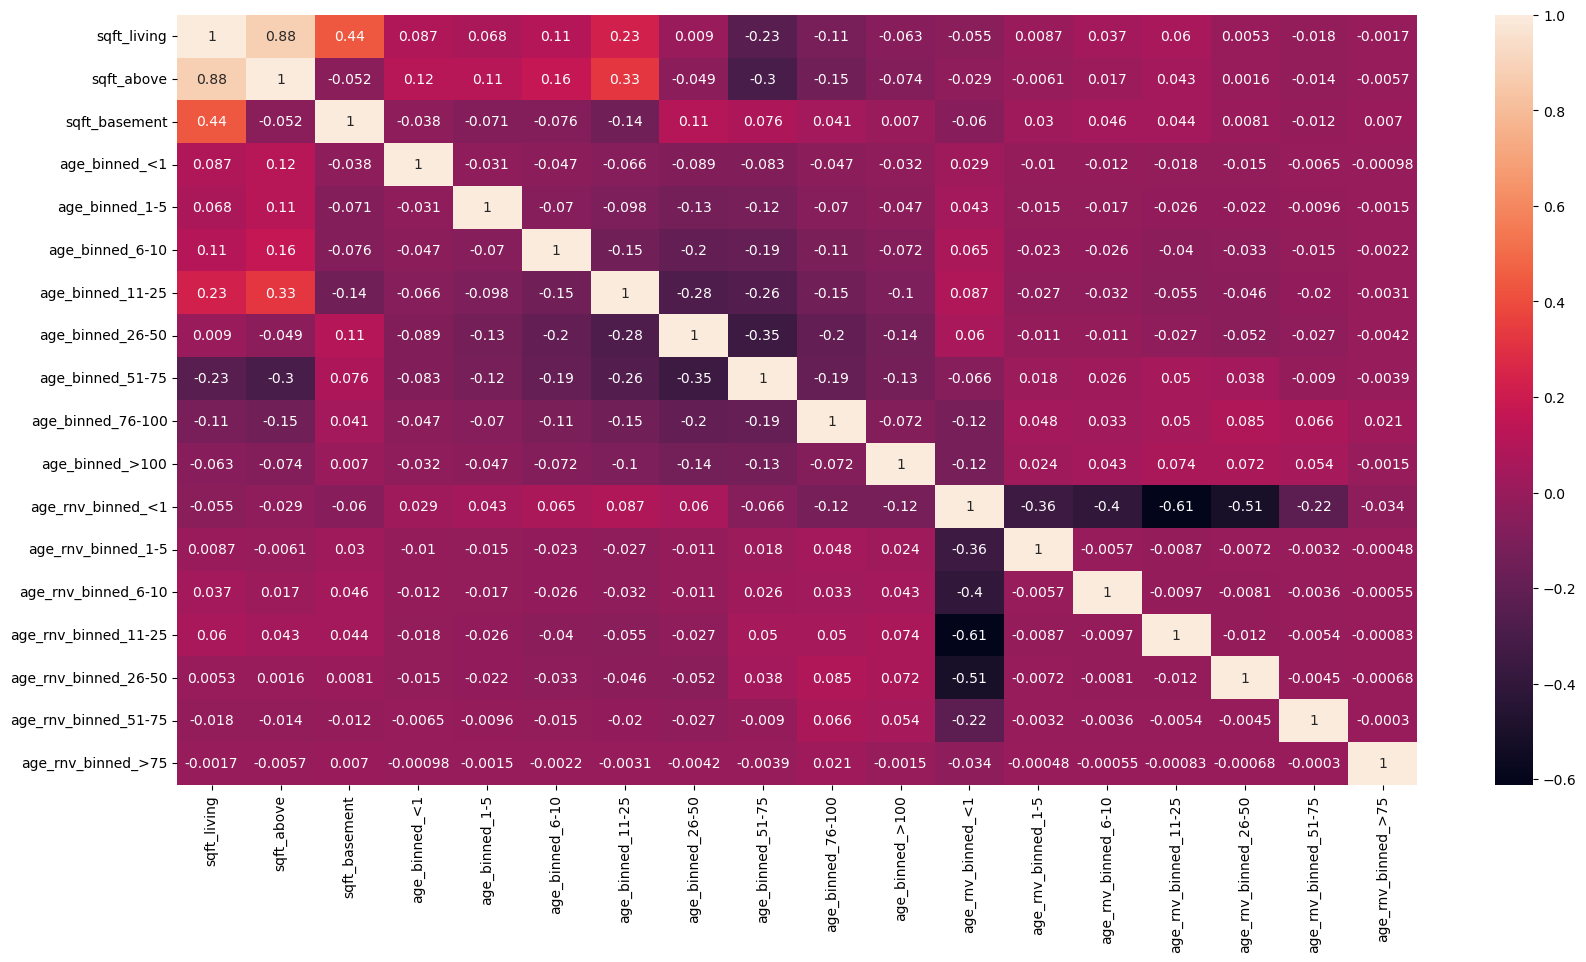

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(X[columns_with_large_vif].corr(),annot=True,fmt='.2g')
plt.show()

To remove multi collinearity we have to remove one of the variables that are highly correlated. 

Model 3. ridge regression

In [47]:
import sklearn
from sklearn import linear_model


train_data_dm,test_data_dm=train_test_split(df_dm,train_size=0.8,random_state=3)


features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

print('alpha =10')

complex_model_R=linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])


pred=complex_model_R.predict(test_data_dm[features])



RMSE=np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred))
print('RMSE on test data:',RMSE)

R_squared_training=complex_model_R.score(train_data_dm[features],train_data_dm['price'])
print('R_squared_training:',R_squared_training)

R_squared_testing=complex_model_R.score(test_data_dm[features],test_data_dm['price'])
print('R_squared_testing:',R_squared_testing)

cv = cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean()
print('CV:',cv)



alpha =10
RMSE on test data: 191903.54821428453
R_squared_training: 0.7007619408390419
R_squared_testing: 0.713097334053241
CV: 0.6982731477399389


Model 4. lasso regression

In [48]:
import sklearn
from sklearn import linear_model


train_data_dm,test_data_dm=train_test_split(df_dm,train_size=0.8,random_state=3)


features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']


print('alpha 10')
complex_model_R=linear_model.Lasso(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])


pred=complex_model_R.predict(test_data_dm[features])


RMSE=np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred))
print('RMSE for test data:',RMSE)

R_squared_training=complex_model_R.score(train_data_dm[features],train_data_dm['price'])
print('R_squared_training:',R_squared_training)

R_squared_testing=complex_model_R.score(test_data_dm[features],test_data_dm['price'])
print('R_squared_testing:',R_squared_testing)


cv = cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean()
print('CV:',cv)

alpha 10
RMSE for test data: 192060.14368262465
R_squared_training: 0.700651574647955
R_squared_testing: 0.7126289113638353
CV: 0.6981634556965397


Model 5. Polynomial regression (with preprocessed data)

In [49]:
from sklearn.preprocessing import PolynomialFeatures

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']


poly_model = PolynomialFeatures(degree=2)

X_allpoly = poly_model.fit_transform(df_dm[features])
X_trainpoly = poly_model.fit_transform(train_X[features])
X_testpoly = poly_model.fit_transform(test_X[features])

poly = linear_model.LinearRegression().fit(X_trainpoly, train_Y)


pred = poly.predict(X_testpoly)
rmse =np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred))
r2_train = poly.score(X_trainpoly,train_data_dm['price'])
r2_test = poly.score(X_testpoly,test_data_dm['price'])
cv = cross_val_score(linear_model.LinearRegression(),X_allpoly,df_dm['price'],cv=5).mean()

print('the rmse for train data is :',rmse)
print('the r2 value for train data is :',r2_train)
print('the r2 value for test data is :',r2_test)
print('cv : ',cv)


the rmse for train data is : 151625.03556706916
the r2 value for train data is : 0.8404012334496511
the r2 value for test data is : 0.8208938882352697
cv :  -10759.647351202058


The cross validation score is negative which can mean various things like random flactuations in the data or overfitting or it is that the model is worse.

Model 6. polynomial regression (in the original dataset without preprocessing)

In [50]:
df.columns
X=df.drop(['price'],axis=1)
Y=df['price']

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=100)
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [51]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_X[features])
X_testpoly = polyfeat.fit_transform(test_X[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_Y)

pred1 = poly.predict(X_testpoly)
rmse1 = float(format(np.sqrt(metrics.mean_squared_error(test_Y,pred1)),'.3f'))
r2_train1 = float(format(poly.score(X_trainpoly,train_Y),'.3f'))
r2_test1 = float(format(poly.score(X_testpoly,test_Y),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))

print('the rmse for train data is :',rmse1)
print('the r2 value for train data is :',r2_train1)
print('the r2 value for test data is :',r2_test1)
print('cv : ',cv1)


the rmse for train data is : 157955.789
the r2 value for train data is : 0.831
the r2 value for test data is : 0.815
cv :  0.813


This is the best model with 81.3% accuracy.